In [2]:
import numpy as np
import pandas as pd
import requests
import json
import datetime

In [3]:
url1 = "https://ptabdata.uspto.gov/ptab-api/trials?filingDateFrom=2019-08-01&filingDateTo=2019-08-20&limit=100"
url2 = "https://ptabdata.uspto.gov/ptab-api/trials?filingDateFrom=2019-08-21&filingDateTo=2019-08-31&limit=100"

In [4]:
ptab1 = requests.get(url1).json()
ptab2 = requests.get(url2).json()

In [7]:
ptab_df_1 = pd.DataFrame(ptab1['results'])
ptab_df_2 = pd.DataFrame(ptab2['results'])

In [8]:
ptab_df = pd.concat([ptab_df_1,ptab_df_2])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
ptab_df = ptab_df.loc[:, ptab_df.columns!='links']

In [10]:
def make_clickable(number):
    return '<a href=https://patents.google.com/patent/US{}>{}</a>'.format(number, number)
df = ptab_df.drop(['prosecutionStatus', 'trialName'], axis = 1)
#df.style.format({'patentNumber':make_clickable})

In [11]:
df.reset_index(drop=True).style.format({'patentNumber':make_clickable})

,accordedFilingDate,applicationNumber,filingDate,lastModifiedDatetime,patentNumber,patentOwnerName,petitionerPartyName,trialNumber
0,2019-08-01,13335649,2019-08-01,2019-08-21T13:29:54,8448215,Hassell et al,"Comcast Cable Communications, LLC",IPR2019-01354
1,nan,13335649,2019-08-01,2019-08-20T19:36:08,8448215,Hassell et al,"Comcast Cable Communications, LLC",IPR2019-01355
2,nan,14531624,2019-08-01,2019-08-21T17:00:33,9055319,Ellis et al,"Comcast Cable Communications, LLC",IPR2019-01376
3,nan,14531624,2019-08-01,2019-08-21T17:00:43,9055319,Ellis et al,"Comcast Cable Communications, LLC",IPR2019-01377
4,2019-08-02,12898520,2019-08-02,2019-08-15T11:48:09,9302102,Thomas et al,"Garrett, Salpeter",IPR2019-01382
5,2019-08-02,14320222,2019-08-02,2019-08-15T12:00:34,9526892,Thompson et al,"Garrett, Salpeter",IPR2019-01384
6,2019-08-12,10086741,2019-08-12,2019-08-30T17:13:08,6895118,Valente et al,Sling TV L.L.C.,IPR2019-01391
7,2019-08-13,15463425,2019-08-13,2019-08-30T16:56:59,9810166,Cohn et al,Ford Motor Company,IPR2019-01399
8,2019-08-13,13117448,2019-08-13,2019-08-30T17:06:46,8069839,Cohn et al,Ford Motor Company,IPR2019-01400
9,2019-08-13,14478069,2019-08-13,2019-08-30T17:12:15,9255519,Cohn et al,Ford Motor Company,IPR2019-01401


Text(0, 0.5, 'Count of filings')

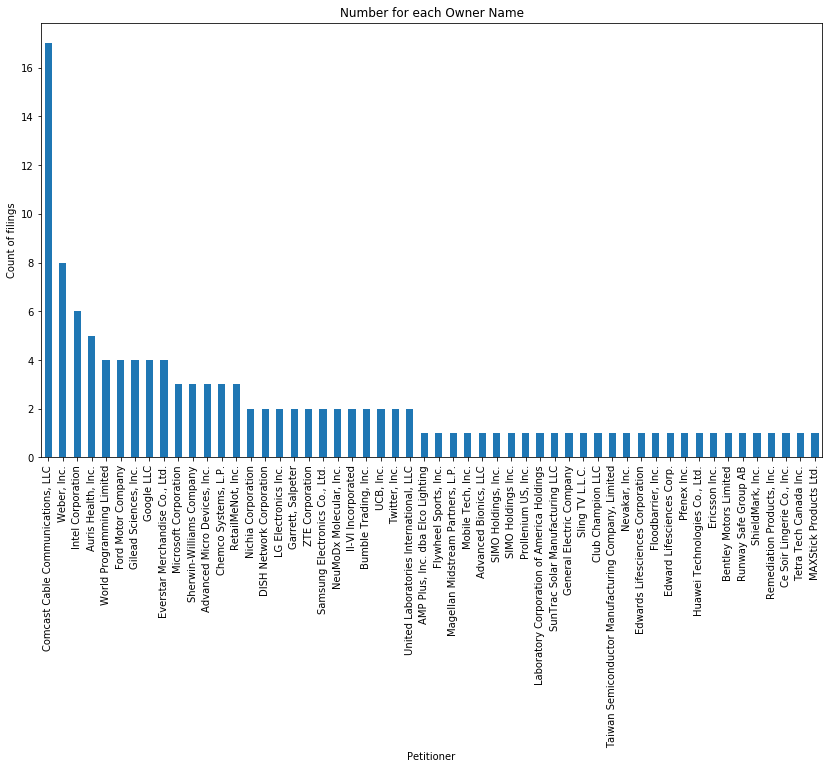

In [12]:
ax = df['petitionerPartyName'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Petitioner")
ax.set_ylabel("Count of filings")